In [24]:
# Modules
import os
import numpy as np
import matplotlib.pyplot as plt
from   PIL import Image


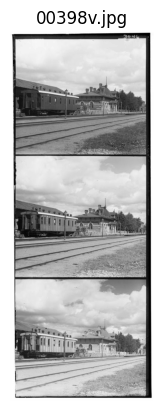

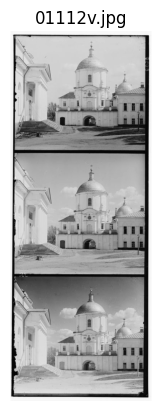

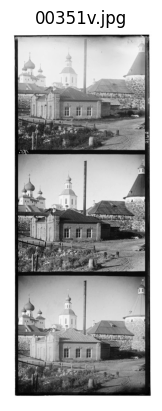

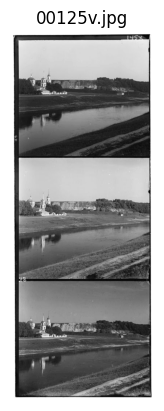

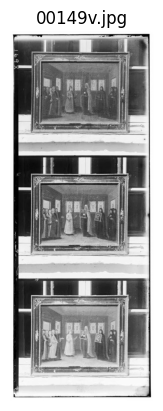

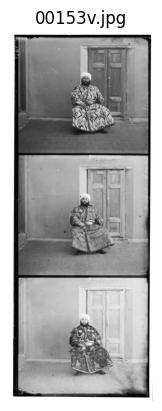

In [25]:
# Load images from directory
directory   = "/home/rashiqul/workspace/ece549/picture/data/"
image_files = [file for file in os.listdir(directory) if file.lower().endswith('.jpg')]

# Display aa 6 images
for file in image_files:
    path  = os.path.join(directory, file)
    image = Image.open(path)
    plt.imshow(image, cmap='gray')
    plt.title(file)
    plt.axis('off')
    plt.show()

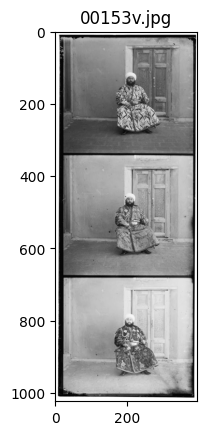

In [26]:
# Let's work with the first image in the list
image_path = os.path.join(directory, image_files[0])
image0 = Image.open(path)
plt.imshow(image0, cmap='gray')
plt.title(file)
plt.show()

In [27]:
# Normalize the image to [0, 1] range and display it
image0 = np.array(image0) / 255.0

# Print the image dimension, size and the matrix
print(f"Image dimensions: {image0.shape}")
print(f"Image size: {image0.size}")
print(f"Image matrix:\n{image0}")

Image dimensions: (1024, 394)
Image size: 403456
Image matrix:
[[0.99607843 0.99607843 0.99607843 ... 0.99607843 1.         1.        ]
 [0.99607843 0.99607843 0.99607843 ... 0.99607843 1.         1.        ]
 [0.99607843 0.99607843 0.99607843 ... 0.99607843 1.         1.        ]
 ...
 [1.         1.         1.         ... 0.99607843 1.         0.60392157]
 [1.         1.         1.         ... 0.99607843 1.         0.59215686]
 [1.         1.         1.         ... 0.99607843 1.         0.58431373]]


In [28]:
# Calculate the height of the image
height = image0.shape[0]
# Calculate the height per channel
height_per_channel = int(height / 3)

# Print the height per channel
print(f"Height per channel: {height_per_channel}") 

Height per channel: 341


In [29]:
# Slice the image into its three color channels using the calculated height_per_channel
red_channel   = image0[0 : height_per_channel, :]
green_channel = image0[height_per_channel : 2 * height_per_channel, :]
blue_channel  = image0[2 * height_per_channel : 3 * height_per_channel, :]

Reds Dimension: (341, 394)


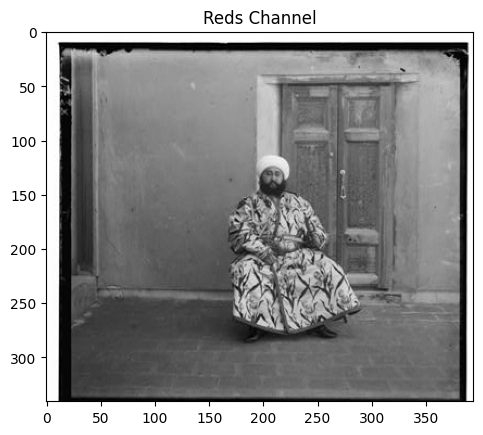

Greens Dimension: (341, 394)


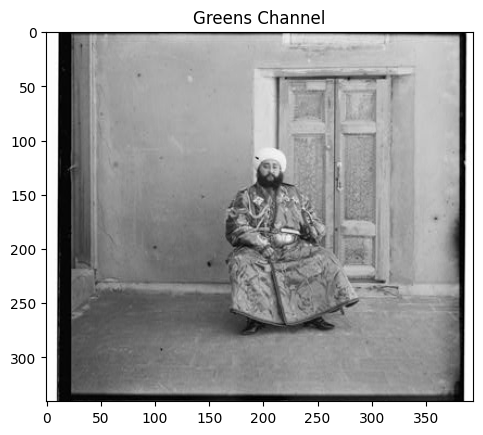

Blues Dimension: (341, 394)


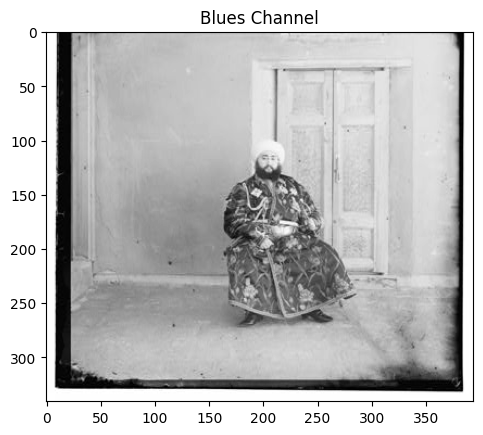

In [30]:
# Display the channels
for channel, color in zip([red_channel, green_channel, blue_channel], ['Reds', 'Greens', 'Blues']):
    plt.imshow(channel, cmap='gray')
    plt.title(f"{color} Channel")
    print(f"{color} Dimension: {channel.shape}")
    plt.show()

In [ ]:
# Borders and clean-up
# There are black borders at the very top, bottom, left, and right of the image.
# These borders can be removed by slicing the image appropriately.
# Let's assume the borders are 8% wide on each side (taking a number in between 5-10%).

def remove_borders(channel, border_percent=0.08):
    """
    Function to remove borders from a given channel.
    """
    height, width = channel.shape
    # Get border sizes 
    top     = int(height * border_percent)
    bottom  = int(height * (1 - border_percent))
    left    = int(width * border_percent)
    right   = int(width * (1 - border_percent))
    # Crop the channel
    cropped = channel[top:bottom, left:right]
    
    return cropped


Reds Dimension after border removal: (286, 331)


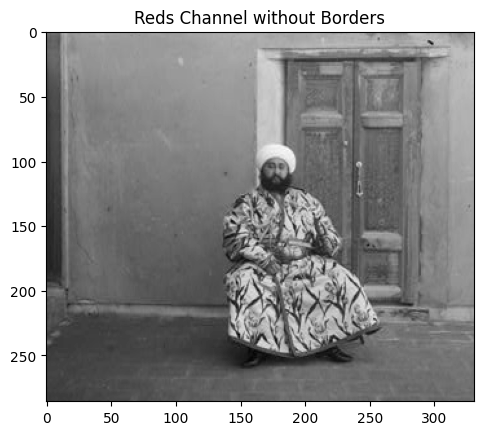

Greens Dimension after border removal: (286, 331)


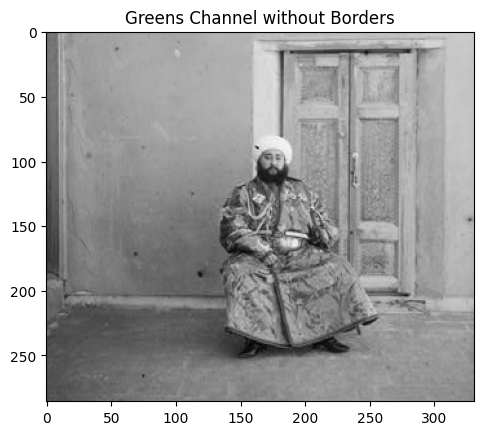

Blues Dimension after border removal: (286, 331)


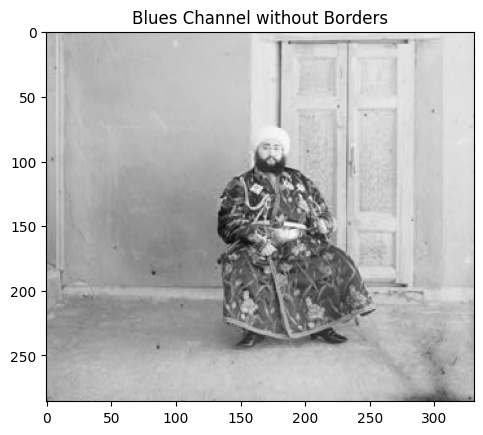

In [32]:
# Remove borders from each channel
red_channel   = remove_borders(red_channel)
green_channel = remove_borders(green_channel)
blue_channel  = remove_borders(blue_channel)

# Display the channels after border removal
for channel, color in zip([red_channel, green_channel, blue_channel], ['Reds', 'Greens', 'Blues']):
    plt.imshow(channel, cmap='gray')
    plt.title(f"{color} Channel without Borders")
    print(f"{color} Dimension after border removal: {channel.shape}")
    plt.show()